### Import

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Read the file

In [61]:
df = pd.read_csv('USA_cars.csv')
df = df.sort_values(by=['mileage'])
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
545,545,0,gmc,door,1993,salvage insurance,0.0,light blue,1gkfk16k5pj701631,167358601,colorado,usa,18 hours left
504,504,100,peterbilt,truck,2012,salvage insurance,0.0,blue,1xp4d49x1cd144875,167529787,florida,usa,17 hours left
1619,1619,650,ford,door,2017,salvage insurance,0.0,black,1fadp3k21hl268441,167651911,california,usa,2 days left
309,309,0,chevrolet,door,2004,salvage insurance,0.0,maroon,3gnek12t74g240524,167418651,wyoming,usa,18 hours left
1236,1236,4200,ford,door,2013,clean vehicle,0.0,no_color,1fadp3j23dl155179,167773673,pennsylvania,usa,2 days left


### Assign filtered data base to new variables

In [62]:
ford = df[(df['brand']=='ford') & (df['mileage'] < 150000) & (df['price'] > 0) & (df['title_status'] == 'clean vehicle') & (df['year'] > 2009 ) & (df['model'] == 'door')]

chevrolet = df[(df['brand']=='chevrolet') & (df['mileage'] < 150000) & (df['price'] > 0) & (df['title_status'] == 'clean vehicle') & (df['year'] > 2009 ) & (df['model'] == 'door')]

dodge = df[(df['brand']=='dodge') & (df['mileage'] < 150000) & (df['price'] > 0) & (df['title_status'] == 'clean vehicle') & (df['year'] > 2009 ) & (df['model'] == 'door')]

### Plot linear regression for each car brand

[14542.26434382]
0.07382538242647085


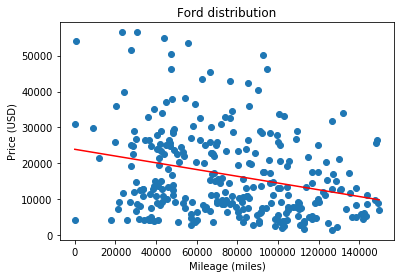

In [63]:
%matplotlib inline
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.scatter(ford.mileage, ford.price)

reg = linear_model.LinearRegression()
reg.fit(ford[['mileage']], ford.price)
plt.title('Ford distribution')
plt.plot(ford.mileage,reg.predict(ford[['mileage']]), color = 'red')
print(reg.predict([[100000]]))
print(r2_score(ford.price,reg.predict(ford[['mileage']] )))



[10796.05341527]
0.28972689267038254


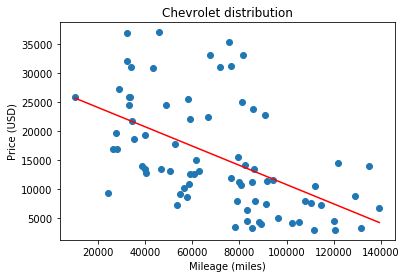

In [64]:
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.scatter(chevrolet.mileage, chevrolet.price)

reg = linear_model.LinearRegression()
reg.fit(chevrolet[['mileage']], chevrolet.price)
plt.title('Chevrolet distribution')
plt.plot(chevrolet.mileage,reg.predict(chevrolet[['mileage']]), color = 'red')
print(reg.predict([[100000]]))
print(r2_score(chevrolet.price,reg.predict(chevrolet[['mileage']] )))

[8294.34381289]
0.2214607912698464


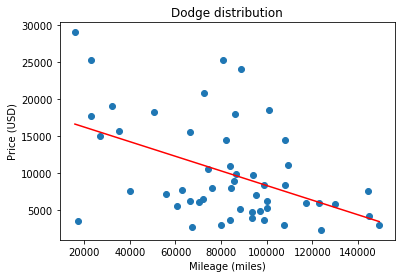

In [65]:
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.scatter(dodge.mileage, dodge.price)

reg = linear_model.LinearRegression()
reg.fit(dodge[['mileage']], dodge.price)
plt.title('Dodge distribution')
plt.plot(dodge.mileage,reg.predict(dodge[['mileage']]), color = 'red')
print(reg.predict([[100000]]))
print(r2_score(dodge.price,reg.predict(dodge[['mileage']] )))


### Plot polynomial regression for each car brand

[[14390.27933096]]
0.07395956469115006


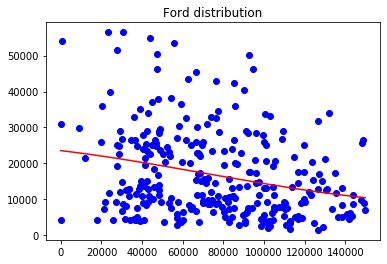

In [66]:
%matplotlib inline
X = ford[['mileage']].values
y = ford[['price']].values

#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split

LinReg = LinearRegression()
LinReg.fit(X, y)

# Add the polynomial term to the equation/model
polynom = PolynomialFeatures(degree = 3) 
X_polynom = polynom.fit_transform(X) 
  
#Fit the Polynomial Regression Model 
PolyReg = LinearRegression() 
PolyReg.fit(X_polynom, y)

plt.title('Ford distribution')
plt.scatter(X, y, color = 'blue') 
plt.plot(X, PolyReg.predict(polynom.fit_transform(X)), color = 'red') 

print(PolyReg.predict(polynom.fit_transform([[100000]])))
print(r2_score(y,PolyReg.predict(polynom.fit_transform(X))))

[[9704.17993767]]
0.2993733551975226


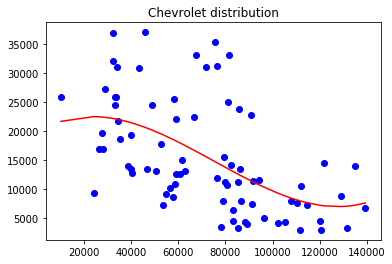

In [67]:
%matplotlib inline
X = chevrolet[['mileage']].values
y = chevrolet[['price']].values

#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split

LinReg = LinearRegression()
LinReg.fit(X, y)

# Add the polynomial term to the equation/model
polynom = PolynomialFeatures(degree = 3) 
X_polynom = polynom.fit_transform(X) 
  
#Fit the Polynomial Regression Model 
PolyReg = LinearRegression() 
PolyReg.fit(X_polynom, y)

plt.title('Chevrolet distribution')
plt.scatter(X, y, color = 'blue') 
plt.plot(X, PolyReg.predict(polynom.fit_transform(X)), color = 'red') 

print(PolyReg.predict(polynom.fit_transform([[100000]])))
print(r2_score(y,PolyReg.predict(polynom.fit_transform(X))))

[[8669.7234948]]
0.24159759932700853


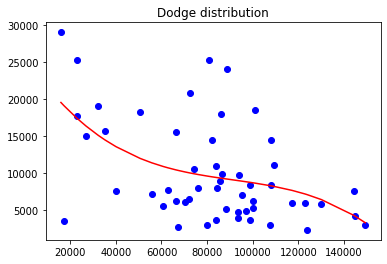

In [68]:
%matplotlib inline
X = dodge[['mileage']].values
y = dodge[['price']].values

#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split

LinReg = LinearRegression()
LinReg.fit(X, y)

# Add the polynomial term to the equation/model
polynom = PolynomialFeatures(degree = 3) 
X_polynom = polynom.fit_transform(X) 
  
#Fit the Polynomial Regression Model 
PolyReg = LinearRegression() 
PolyReg.fit(X_polynom, y)

plt.title('Dodge distribution')
plt.scatter(X, y, color = 'blue') 
plt.plot(X, PolyReg.predict(polynom.fit_transform(X)), color = 'red') 

print(PolyReg.predict(polynom.fit_transform([[100000]])))
print(r2_score(y,PolyReg.predict(polynom.fit_transform(X))))

[[10596.46609127]]
0.24819367974495488


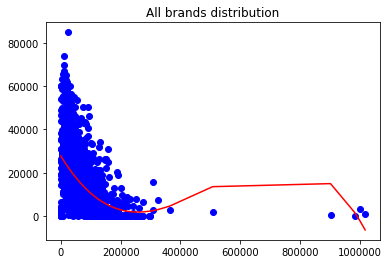

In [69]:
%matplotlib inline
X = df[['mileage']].values
y = df[['price']].values

#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split

LinReg = LinearRegression()
LinReg.fit(X, y)

# Add the polynomial term to the equation/model
polynom = PolynomialFeatures(degree = 3) 
X_polynom = polynom.fit_transform(X) 
  
#Fit the Polynomial Regression Model 
PolyReg = LinearRegression() 
PolyReg.fit(X_polynom, y)

plt.title('All brands distribution')
plt.scatter(X, y, color = 'blue') 
plt.plot(X, PolyReg.predict(polynom.fit_transform(X)), color = 'red') 

print(PolyReg.predict(polynom.fit_transform([[100000]])))
print(r2_score(y,PolyReg.predict(polynom.fit_transform(X))))